In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
np.set_printoptions(precision=6, threshold=10)
plt.set_cmap('coolwarm_r')

<Figure size 432x288 with 0 Axes>

### Generating Bivariate Data

In [3]:
def generate_data(size):
    x1 = np.random.randn(size)
    x2 = np.log(np.random.rand(size))
    return np.c_[x1, x2]

In [4]:
X = generate_data(500)
x1, x2 = X.T

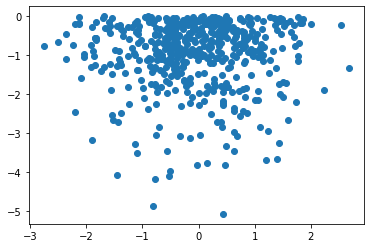

In [5]:
plt.scatter(x1, x2)

### Transforming Features 

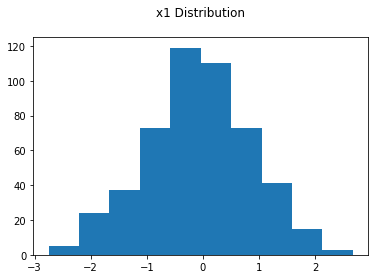

In [6]:
plt.hist(x1)
plt.title('x1 Distribution\n');

x1 is already a gausian distribution <br> <br>

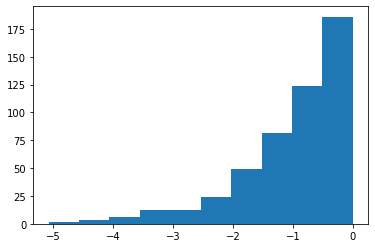

In [7]:
plt.hist(x2);

x2 is not in a gaussian distribution hence needs to be transformed. <br> <br>

(array([10., 35., 69., 75., 94., 98., 63., 31., 19.,  6.]),
 array([0.017421, 0.207197, 0.396973, ..., 1.535631, 1.725407, 1.915184]),
 <BarContainer object of 10 artists>)

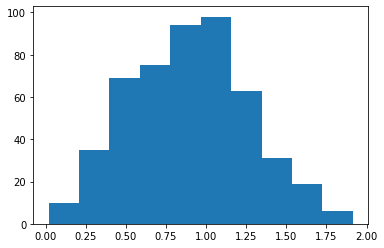

In [8]:
x2_transformed = (x2 ** 2) ** 0.2
plt.hist(x2_transformed)

In [9]:
x2 = x2_transformed

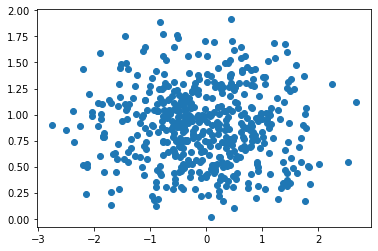

In [10]:
plt.scatter(x1, x2)

### Gaussian Distribution Model

In [11]:
gaussian_fit = lambda x, mu, s : 1 / np.sqrt(2 * np.pi * s ** 2) * np.exp(-(x - mu) ** 2 / (2 * s ** 2))

In [12]:
p1 = gaussian_fit(x1, x1.mean(), x1.std())
p2 = gaussian_fit(x2, x2.mean(), x2.std())

In [13]:
probs = p1 * p2 
probs

array([0.443521, 0.18933 , 0.303139, ..., 0.259877, 0.240071, 0.412619])

### Anamoly Detection

In [14]:
epsilon = 0.05
anamolies = probs < epsilon
anamolies

array([False, False, False, ..., False, False, False])

Text(0.5, 1.0, 'Anamoly Detection')

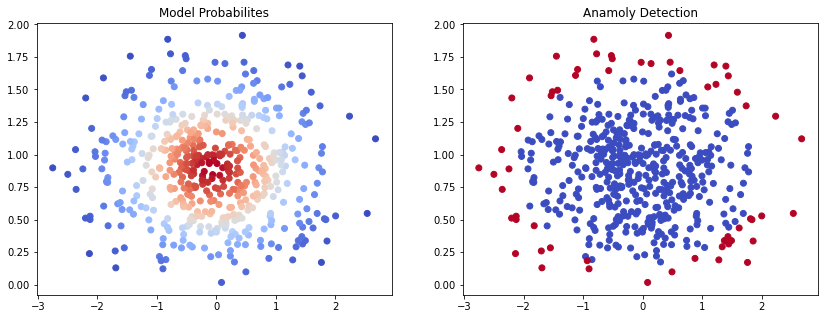

In [37]:
fig = plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.scatter(x1, x2, c=probs, cmap='coolwarm')
plt.title('Model Probabilites')
plt.subplot(122)
plt.scatter(x1, x2, c=anamolies, cmap='coolwarm')
plt.title('Anamoly Detection')